In [ ]:
import networkx as nx
import queue as Q

In [ ]:
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        #plt.show()

In [ ]:
# Construção manual do dicionário
listaAdj = {}
listaAdj = {
            'Arad': {'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118},
            'Zerind': {'Arad': 75, 'Oradea': 71},
            'Oradea': {'Zerind': 71, 'Sibiu': 151},
            'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},\
            'Timisoara': {'Arad': 118, 'Lugoj': 111},
            'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
            'Mehadia': {'Lugoj': 70, 'Dobreta': 75},
            'Dobreta': {'Mehadia': 75, 'Craiova': 120},
            'Craiova': {'Dobreta': 120, 'Rimnicu': 146, 'Pitesti': 138},
            'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
            'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
            'Pitesti': {'Rimnicu': 97, 'Craiova': 138, 'Bucharest': 101},
            'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
            'Giurgiu': {'Bucharest': 90},
            'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},
            'Hirsova': {'Urziceni': 98, 'Eforie': 86},
            'Eforie': {'Hirsova': 86},
            'Vaslui': {'Iasi': 92, 'Urziceni': 142},
            'Iasi': {'Vaslui': 92, 'Neamt': 87},
            'Neamt': {'Iasi': 87}
        }

In [ ]:
heuristics = {'Arad':366, 
              'Bucharest':0,
              'Craiova':160,
              'Dobreta': 242,
              'Eforie': 161,
              'Fagaras': 178,
              'Giurgiu': 77,
              'Hirsova': 151,
              'Iasi': 226,
              'Lugoj': 244,
              'Mehadia': 241,
              'Neamt': 234,
              'Oradea': 380,
              'Pitesti': 98,
              'Rimnicu': 193,
              'Sibiu': 253,
              'Timisoara': 329,
              'Urziceni': 80,
              'Vaslui': 199,
              'Zerind': 374
}

In [ ]:
def getFilaPrioridade(adjacentes, distancias):
	print(adjacentes)
	q = Q.PriorityQueue()
	for node in adjacentes:		
		q.put(distancias[node],node)		
	return q

In [ ]:
def getNomeCidade(d, val):
    for k, v in d.items():
       if v == val:
          return k 
    #Alternativa: list comprehension      
    #return [k for k, v in d.items() if v == val]


In [ ]:
# Função iterativa
def buscar_iterativo(origem, objetivo, visitado, distancias, graph, q):
    print("\nAtual: %s - custo %d" % (origem, distancias[origem]))
    visitado.append(origem)
    q.put(distancias[origem],origem)
                  
    while not q.empty() and origem != objetivo:  
        # Recebe a fila de prioridade dos vértices adjacentes
        for node in listaAdj[origem]:
          q.put(distancias[node],node)
        #Obtem o menor de custo na Fila de prioridades
        custo = q.get()
        #Obtem o nome da cidade a partir do menor custo 
        cidade = getNomeCidade(distancias, custo) 
        #print(cidade)                        
        graph.addEdge(origem, cidade)
                       
        print("Ir para cidade: %s" % cidade)
        if cidade not in visitado:
            origem = cidade
            print("\nAtual: %s - custo %d" % (origem, custo))
            visitado.append(origem)

In [ ]:
# Função recursiva
def buscar(origem, objetivo, visitado, distancias, graph):
    print("\nAtual: %s" % origem)
    visitado.append(origem)
                  
    if origem == objetivo:              
      return
    else:
       # Recebe a fila de prioridade dos vértices adjacentes
       filaP = getFilaPrioridade(listaAdj[origem],distancias)
                                    
       #Obtem o menor de custo na Fila de prioridades
       custo = filaP.get()
       print(custo)
       #Obtem o nome da cidade a partir do menor custo 
       cidade = getNomeCidade(distancias, custo) 
       #print(cidade)                        
       graph.addEdge(origem, cidade)
                     
       print("Ir para cidade: %s" % cidade)
       if cidade not in visitado:
          buscar(cidade, objetivo, visitado, distancias, graph)                    


Atual: Arad
{'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118}
253
Ir para cidade: Sibiu

Atual: Sibiu
{'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80}
178
Ir para cidade: Fagaras

Atual: Fagaras
{'Sibiu': 99, 'Bucharest': 211}
0
Ir para cidade: Bucharest

Atual: Bucharest


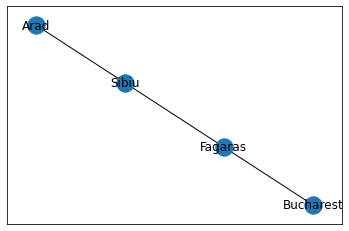

In [ ]:
q = Q.PriorityQueue()
G = GraphVisualization()
visitado = []
buscar('Arad', 'Bucharest', visitado, heuristics, G)
#buscar_iterativo('Arad', 'Bucharest', visitado, heuristics, G, q)
G.visualize()

## **Exemplo com Fila de Prioridade:**

In [ ]:
from queue import PriorityQueue
customers = PriorityQueue() #we initialise the PQ class instead of using a function to operate upon a list. 
customers.put((366, 'Arad'))
customers.put((393, 'Sibiu'))
customers.put((449, 'Zerind'))
customers.put((447, 'Timisoara'))
customers.put((671, 'Oradea'))
customers.put((415, 'Fagaras'))
customers.put((413, 'Rimnicu'))
customers.put((526, 'Craiova'))
customers.put((417, 'Pitesti'))
customers.put((0, 'Bucharest'))
while not customers.empty():
   x = customers.get()
   print(x)
   print(type(x))

(0, 'Bucharest')
<class 'tuple'>
(366, 'Arad')
<class 'tuple'>
(393, 'Sibiu')
<class 'tuple'>
(413, 'Rimnicu')
<class 'tuple'>
(415, 'Fagaras')
<class 'tuple'>
(417, 'Pitesti')
<class 'tuple'>
(447, 'Timisoara')
<class 'tuple'>
(449, 'Zerind')
<class 'tuple'>
(526, 'Craiova')
<class 'tuple'>
(671, 'Oradea')
<class 'tuple'>
